<a href="https://colab.research.google.com/github/szyck/final_project/blob/samuelbranch/MobilePhoneAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

!pip install pyspark
!pip install -U -q PyDrive
!apt install openjdk-8-jdk-headless -qq
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

# Find the latest version of spark 3.0  from http://www-us.apache.org/dist/spark/ and enter as the spark version
# For example:
# spark_version = 'spark-3.0.2'
spark_version = 'spark-3.1.3'
os.environ['SPARK_VERSION']=spark_version



# Install Spark and Java
!apt-get update
#!apt-get install openjdk-11-jdk-headless -qq > /dev/null
!wget -q http://www.apache.org/dist/spark/$SPARK_VERSION/$SPARK_VERSION-bin-hadoop2.7.tgz
!tar xf $SPARK_VERSION-bin-hadoop2.7.tgz
!pip install -q findspark

# Set Environment Variables
#os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = f"/content/{spark_version}-bin-hadoop2.7"
spark_path = os.environ["SPARK_HOME"]


# Start a SparkSession
import findspark
findspark.init()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.3 MB 42 kB/s 
     |████████████████████████████████| 199 kB 46.7 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764026 sha256=4a9a7e44ba595fca9da52745e70017ab859f20a1cd884e385442f2531b7be664
  Stored in directory: /root/.cache/pip/wheels/7a/8e/1b/f73a52650d2e5f337708d9f6a1750d451a7349a867f928b885
Successfully built pyspark
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  openjdk-8-jre-headless
Suggested packages:
  openjdk-8-demo openjdk-8-source libnss-mdns fonts-dejavu-extra
  fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  fonts-wqy-zenhei fonts-indic
The following NEW packages will be installed:
  openjdk-8-jdk-headless openjdk-8-jre-headless
0 upg

In [ ]:
# Start Spark session
!pip install pyspark==2.3.2
import pyspark 
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Demographics").getOrCreate()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 211.9 MB 20 kB/s 
     |████████████████████████████████| 197 kB 22.0 MB/s 
  Created wheel for pyspark: filename=pyspark-2.3.2-py2.py3-none-any.whl size=212344378 sha256=1b21c9646c8f0926d3e756abbc4fadc0d426b9f175b2965ddb84ab5c804b9454
  Stored in directory: /root/.cache/pip/wheels/bd/3f/bb/cee54d865446970f330979b926919bfb33db0782e636e8e7e7
Successfully built pyspark
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.5
    Uninstalling py4j-0.10.9.5:
      Successfully uninstalled py4j-0.10.9.5
  Attempting uninstall: pyspark
    Found existing installation: pyspark 3.3.0
    Uninstalling pyspark-3.3.0:
      Successfully uninstalled pyspark-3.3.0


In [ ]:
# Read in data from S3 Buckets
from pyspark import SparkFiles

url = "https://mobilephonebucket.s3.us-east-2.amazonaws.com/test.csv"
spark.sparkContext.addFile(url)
df = spark.read.csv(SparkFiles.get("test.csv"), sep=",", header=True)

# Show DataFrame
df.show()

+---+-------------+----+-----------+--------+---+------+----------+-----+---------+-------+---+---------+--------+----+----+----+---------+-------+------------+----+
| id|battery_power|blue|clock_speed|dual_sim| fc|four_g|int_memory|m_dep|mobile_wt|n_cores| pc|px_height|px_width| ram|sc_h|sc_w|talk_time|three_g|touch_screen|wifi|
+---+-------------+----+-----------+--------+---+------+----------+-----+---------+-------+---+---------+--------+----+----+----+---------+-------+------------+----+
|  1|         1043|   1|        1.8|       1| 14|     0|         5|  0.1|      193|      3| 16|      226|    1412|3476|  12|   7|        2|      0|           1|   0|
|  2|          841|   1|        0.5|       1|  4|     1|        61|  0.8|      191|      5| 12|      746|     857|3895|   6|   0|        7|      1|           0|   0|
|  3|         1807|   1|        2.8|       0|  1|     0|        27|  0.9|      186|      3|  4|     1270|    1366|2396|  17|  10|       10|      0|           1|   1|
|  4

In [ ]:
# Print the column names
url2 = "https://mobilephonebucket.s3.us-east-2.amazonaws.com/train.csv"
spark.sparkContext.addFile(url2)
df2 = spark.read.csv(SparkFiles.get("train.csv"), sep=",", header=True)
df2.show()

+-------------+----+-----------+--------+---+------+----------+-----+---------+-------+---+---------+--------+----+----+----+---------+-------+------------+----+-----------+
|battery_power|blue|clock_speed|dual_sim| fc|four_g|int_memory|m_dep|mobile_wt|n_cores| pc|px_height|px_width| ram|sc_h|sc_w|talk_time|three_g|touch_screen|wifi|price_range|
+-------------+----+-----------+--------+---+------+----------+-----+---------+-------+---+---------+--------+----+----+----+---------+-------+------------+----+-----------+
|          842|   0|        2.2|       0|  1|     0|         7|  0.6|      188|      2|  2|       20|     756|2549|   9|   7|       19|      0|           0|   1|          1|
|         1021|   1|        0.5|       1|  0|     1|        53|  0.7|      136|      3|  6|      905|    1988|2631|  17|   3|        7|      1|           1|   0|          2|
|          563|   1|        0.5|       1|  2|     1|        41|  0.9|      145|      5|  6|     1263|    1716|2603|  11|   2|     

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


font = {'size'   : 14}
plt.rc('font', **font)
warnings.filterwarnings("ignore")

In [ ]:
# Import Dataset

pandasDF = df2.toPandas()
x = pandasDF.iloc[:,0:20]
y = pandasDF.iloc[:,20]
pd.set_option('display.max_columns', None)

In [ ]:
# Create correlation matrix
pandasDF = pandasDF.astype(float)
corr_matrix = pandasDF.corr()
print(corr_matrix)

               battery_power      blue  clock_speed  dual_sim        fc  \
battery_power       1.000000  0.011252     0.011482 -0.041847  0.033334   
blue                0.011252  1.000000     0.021419  0.035198  0.003593   
clock_speed         0.011482  0.021419     1.000000 -0.001315 -0.000434   
dual_sim           -0.041847  0.035198    -0.001315  1.000000 -0.029123   
fc                  0.033334  0.003593    -0.000434 -0.029123  1.000000   
four_g              0.015665  0.013443    -0.043073  0.003187 -0.016560   
int_memory         -0.004004  0.041177     0.006545 -0.015679 -0.029133   
m_dep               0.034085  0.004049    -0.014364 -0.022142 -0.001791   
mobile_wt           0.001844 -0.008605     0.012350 -0.008979  0.023618   
n_cores            -0.029727  0.036161    -0.005724 -0.024658 -0.013356   
pc                  0.031441 -0.009952    -0.005245 -0.017143  0.644595   
px_height           0.014901 -0.006872    -0.014523 -0.020875 -0.009990   
px_width           -0.008

Text(0.5, 1.0, 'Correlation of Attirubtues')

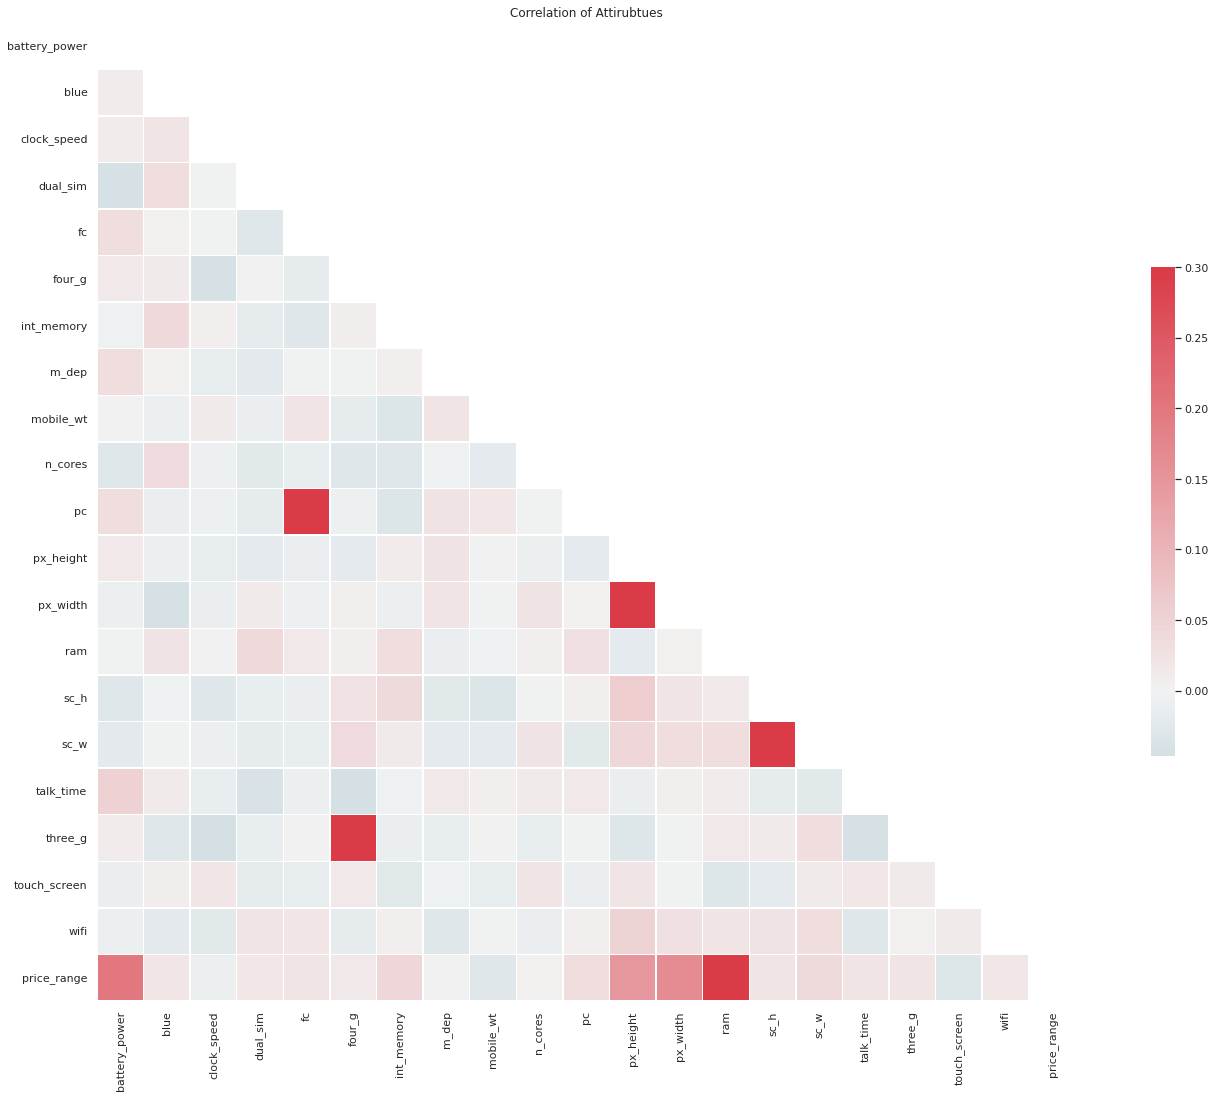

In [ ]:
sns.set(style="white")
# Compute the correlation matrix
# corr = pandasDF.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(27,18))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Correlation of Attirubtues")

------------>Outlier Analysis of Non-Categorical Data<------------



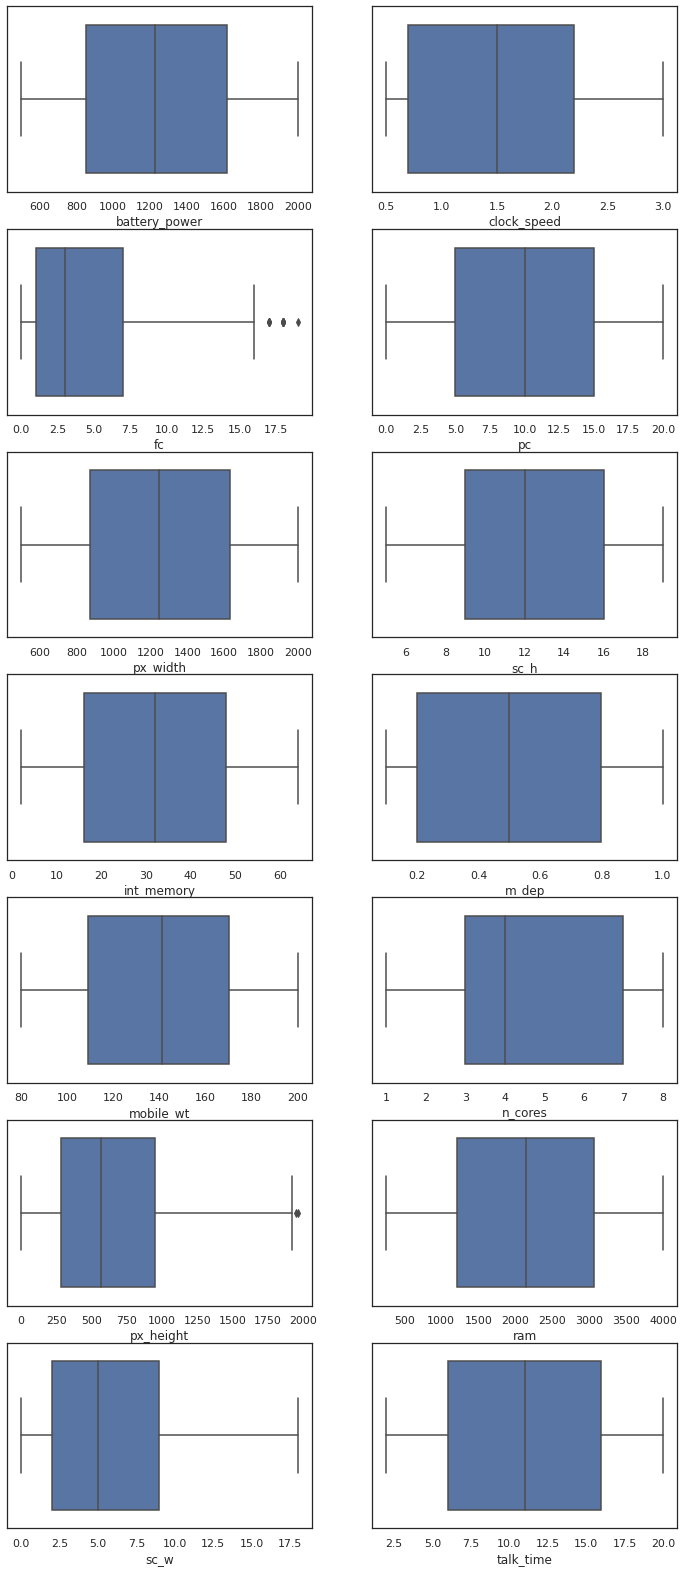

In [ ]:
print("------------>Outlier Analysis of Non-Categorical Data<------------")
print()
fig, ax = plt.subplots(ncols=2, nrows=7, figsize=(12,28))
sns.boxplot(x=pandasDF['battery_power'],ax=ax[0,0])
sns.boxplot(x=pandasDF['clock_speed'],ax=ax[0,1])
sns.boxplot(x=pandasDF['fc'],ax=ax[1,0])
sns.boxplot(x=pandasDF['pc'],ax=ax[1,1])
sns.boxplot(x=pandasDF['px_width'],ax=ax[2,0])
sns.boxplot(x=pandasDF['sc_h'],ax=ax[2,1])
sns.boxplot(x=pandasDF['int_memory'],ax=ax[3,0])
sns.boxplot(x=pandasDF['m_dep'],ax=ax[3,1])
sns.boxplot(x=pandasDF['mobile_wt'],ax=ax[4,0])
sns.boxplot(x=pandasDF['n_cores'],ax=ax[4,1])
sns.boxplot(x=pandasDF['px_height'],ax=ax[5,0])
sns.boxplot(x=pandasDF['ram'],ax=ax[5,1])
sns.boxplot(x=pandasDF['sc_w'],ax=ax[6,0])
sns.boxplot(x=pandasDF['talk_time'],ax=ax[6,1])

Text(0.5, 1.0, 'Correlation between Attributes and Price Range')

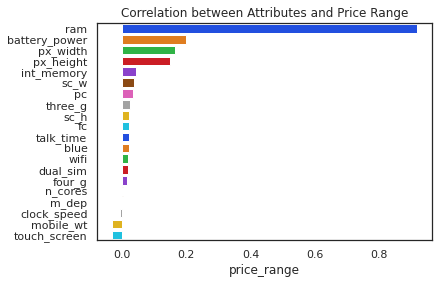

In [ ]:
#we are not considering the correlations between X features among themselves
corr_matrix = pandasDF.corr()
correlation = corr_matrix.price_range
cr = correlation.sort_values(ascending = False)[1:]
sns.barplot(x=cr, y=cr.index,palette = "bright")
plt.title("Correlation between Attributes and Price Range")

------------>Analysis of Attributes<------------



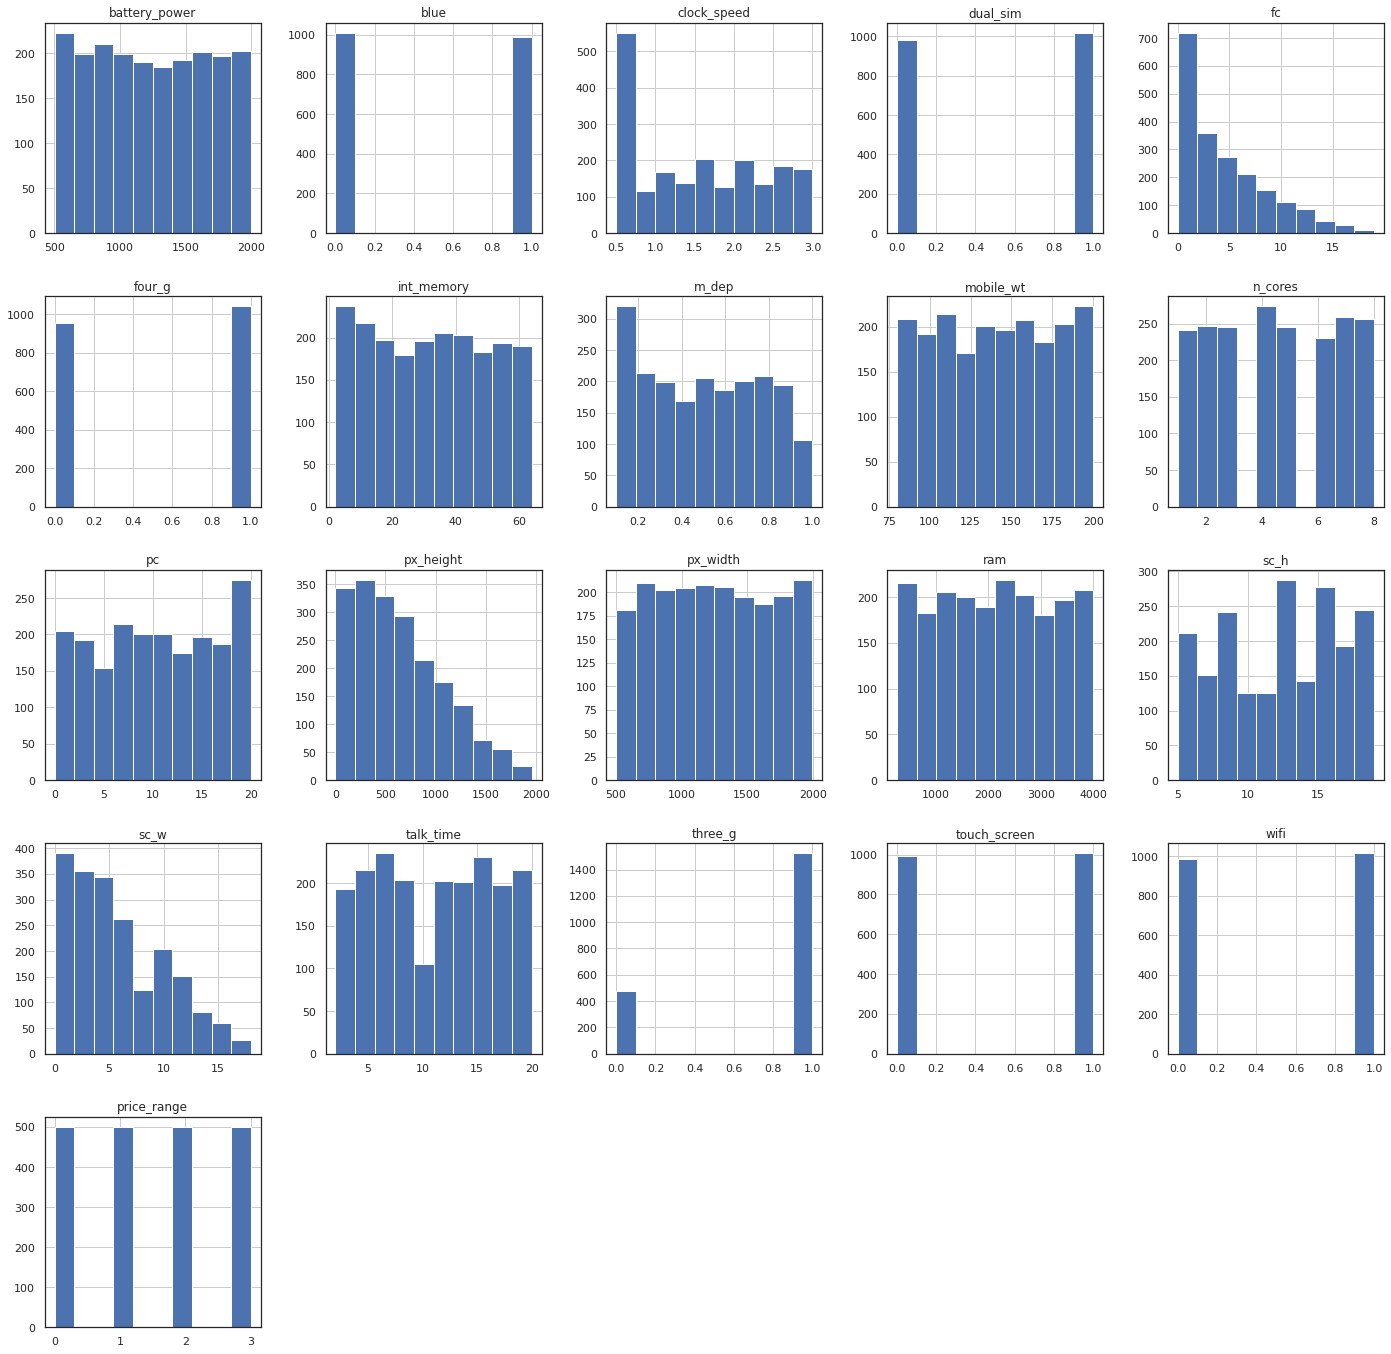

In [ ]:
#data visualization drawing histogram
print("------------>Analysis of Attributes<------------")
print()
pandasDF.hist(sharex=False, sharey=False, figsize=(24,24) )
plt.show()

In [ ]:
#Splitting the training and testing dataset
from sklearn.model_selection import train_test_split
# Splitting of data
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.2, random_state = 0,stratify = y)

In [ ]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
col = pandasDF.iloc[:,:20].columns
x_train_s = sc.fit_transform(x_train)
x_valid_s = sc.fit_transform(x_valid)

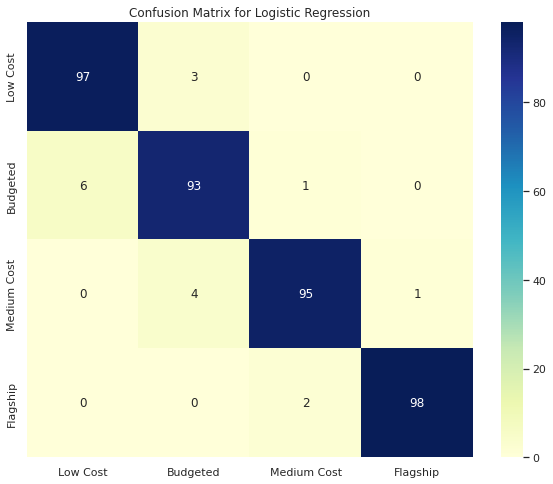

Text(0.5, 1.0, 'Visualizing Important Features for Logistic Regression')

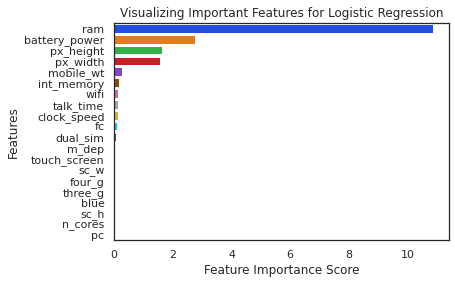

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class = 'multinomial', solver = 'sag',  max_iter = 10000)
lr.fit(x_train_s, y_train)
y_pred_lr = lr.predict(x_valid_s)
#Visualizing the Confusion Matrix
cm = confusion_matrix(y_valid, y_pred_lr)
# label the confusion matrix  
conf_matrix=pd.DataFrame(data=cm,columns=["Low Cost", "Budgeted", "Medium Cost", "Flagship"],index=["Low Cost", "Budgeted", "Medium Cost", "Flagship"])
# plot a heatmap
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.title("Confusion Matrix for Logistic Regression")
plt.show()
#Calculate Accuracy
acc_lr = accuracy_score(y_valid, y_pred_lr)
#Features Contribution
feature_imp = pd.Series(abs(lr.coef_[0]), index=col).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index,palette="bright")
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features for Logistic Regression")

In [ ]:
predictedDataframe = pd.DataFrame(np.column_stack((x_valid, y_pred_lr)))
predictedDataframe.columns =['battery_power', 'blue', 'clock_speed', 'dual_sim','fc','four_g','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h','sc_w','talk_time','three_g','touch_screen','wifi','price_range']
predictedDataframe = predictedDataframe.astype(float)
predictedDataframe

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1836.0,1.0,1.7,1.0,3.0,0.0,26.0,0.1,134.0,6.0,16.0,408.0,1139.0,3097.0,5.0,0.0,18.0,0.0,1.0,0.0,3.0
1,1424.0,1.0,2.9,1.0,0.0,0.0,20.0,0.6,180.0,5.0,0.0,181.0,1199.0,2658.0,15.0,0.0,19.0,1.0,0.0,0.0,2.0
2,730.0,1.0,0.5,1.0,3.0,1.0,27.0,0.1,112.0,5.0,10.0,62.0,846.0,3623.0,9.0,4.0,15.0,1.0,1.0,0.0,2.0
3,1699.0,1.0,0.5,0.0,16.0,0.0,21.0,0.1,156.0,4.0,20.0,105.0,1099.0,1181.0,16.0,0.0,18.0,1.0,1.0,0.0,1.0
4,965.0,1.0,0.5,0.0,15.0,0.0,53.0,1.0,131.0,8.0,19.0,297.0,653.0,3227.0,12.0,6.0,8.0,1.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,765.0,0.0,0.5,1.0,0.0,1.0,47.0,0.3,115.0,8.0,1.0,1277.0,1429.0,2243.0,11.0,7.0,4.0,1.0,0.0,1.0,2.0
396,651.0,1.0,0.8,1.0,2.0,1.0,63.0,0.2,176.0,5.0,4.0,548.0,858.0,2244.0,14.0,9.0,19.0,1.0,1.0,0.0,1.0
397,1973.0,1.0,0.5,1.0,3.0,0.0,21.0,0.8,95.0,8.0,7.0,127.0,507.0,1724.0,12.0,10.0,8.0,0.0,0.0,1.0,1.0
398,1160.0,0.0,1.1,0.0,1.0,1.0,63.0,0.7,166.0,3.0,2.0,762.0,859.0,595.0,18.0,4.0,15.0,1.0,0.0,1.0,0.0


In [ ]:
actualDataframe = pd.DataFrame(np.column_stack((x_valid, y_valid)))
actualDataframe.columns =['battery_power', 'blue', 'clock_speed', 'dual_sim','fc','four_g','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h','sc_w','talk_time','three_g','touch_screen','wifi','price_range']
actualDataframe = actualDataframe.astype(float)
actualDataframe

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1836.0,1.0,1.7,1.0,3.0,0.0,26.0,0.1,134.0,6.0,16.0,408.0,1139.0,3097.0,5.0,0.0,18.0,0.0,1.0,0.0,3.0
1,1424.0,1.0,2.9,1.0,0.0,0.0,20.0,0.6,180.0,5.0,0.0,181.0,1199.0,2658.0,15.0,0.0,19.0,1.0,0.0,0.0,2.0
2,730.0,1.0,0.5,1.0,3.0,1.0,27.0,0.1,112.0,5.0,10.0,62.0,846.0,3623.0,9.0,4.0,15.0,1.0,1.0,0.0,2.0
3,1699.0,1.0,0.5,0.0,16.0,0.0,21.0,0.1,156.0,4.0,20.0,105.0,1099.0,1181.0,16.0,0.0,18.0,1.0,1.0,0.0,1.0
4,965.0,1.0,0.5,0.0,15.0,0.0,53.0,1.0,131.0,8.0,19.0,297.0,653.0,3227.0,12.0,6.0,8.0,1.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,765.0,0.0,0.5,1.0,0.0,1.0,47.0,0.3,115.0,8.0,1.0,1277.0,1429.0,2243.0,11.0,7.0,4.0,1.0,0.0,1.0,2.0
396,651.0,1.0,0.8,1.0,2.0,1.0,63.0,0.2,176.0,5.0,4.0,548.0,858.0,2244.0,14.0,9.0,19.0,1.0,1.0,0.0,1.0
397,1973.0,1.0,0.5,1.0,3.0,0.0,21.0,0.8,95.0,8.0,7.0,127.0,507.0,1724.0,12.0,10.0,8.0,0.0,0.0,1.0,1.0
398,1160.0,0.0,1.1,0.0,1.0,1.0,63.0,0.7,166.0,3.0,2.0,762.0,859.0,595.0,18.0,4.0,15.0,1.0,0.0,1.0,0.0


In [ ]:
# Configure settings for RDS
!wget https://jdbc.postgresql.org/download/postgresql-42.2.9.jar
mode = "append"
jdbc_url="jdbc:postgresql://database-1.ct48y2lqayre.us-east-2.rds.amazonaws.com:5432/phones"
config = {"user":"root",
          "password": "password",
          "driver":"org.postgresql.Driver"}
# Write DataFrame to active_user table in RDS
actualDataframe.write.jdbc(url=jdbc_url, table='actual', mode=mode, properties=config)

--2022-10-03 23:22:49--  https://jdbc.postgresql.org/download/postgresql-42.2.9.jar
Resolving jdbc.postgresql.org (jdbc.postgresql.org)... 72.32.157.228, 2001:4800:3e1:1::228
Connecting to jdbc.postgresql.org (jdbc.postgresql.org)|72.32.157.228|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 914037 (893K) [application/java-archive]
Saving to: ‘postgresql-42.2.9.jar’

postgresql-42.2.9.j 100%[===================>] 892.61K  --.-KB/s    in 0.08s   

2022-10-03 23:22:49 (10.4 MB/s) - ‘postgresql-42.2.9.jar’ saved [914037/914037]



AttributeError: ignored

In [ ]:
actualDataframe.dtypes

battery_power    float64
blue             float64
clock_speed      float64
dual_sim         float64
fc               float64
four_g           float64
int_memory       float64
m_dep            float64
mobile_wt        float64
n_cores          float64
pc               float64
px_height        float64
px_width         float64
ram              float64
sc_h             float64
sc_w             float64
talk_time        float64
three_g          float64
touch_screen     float64
wifi             float64
price_range      float64
dtype: object